<a href="https://colab.research.google.com/github/Maplemx/Agently/blob/main/docs/guidebook/application_development_handbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **_<font color = "red">Agent</font><font color = "blue">ly</font>_ 3.0 Application Development Handbook**
> Don't know what is Agently yet? [>>>  READ THIS FIRST](https://github.com/Maplemx/Agently/blob/main/docs/guidebook/introduction.ipynb)
>
> How to use: `pip install Agently`
>
> Github Repo: https://github.com/Maplemx/Agently
>
> Contact Me: moxin@Agently.cn
>
> If you like this project, please ⭐️ our repo, thanks.

## Quick Start

Highly recommend reading [**_<font color = "red">Agent</font><font color = "blue">ly</font>_** 3.0 Introduction](https://github.com/Maplemx/Agently/blob/main/docs/guidebook/introduction.ipynb) first before we start.

### Package Installation

> ℹ️ If you're using colab or jupyter, run this package installation first to enable all code down below.

In [ ]:
# Main Package
!pip install Agently
# Requirement Packages
## Network
!pip install aiohttp
!pip install websockets
!pip install tornado
## Model Clients
!pip install openai
!pip install httpx
!pip install erniebot
!pip install zhipuai
## Data Format
!pip install PyYAML

### Hello World

In [ ]:
# Import and Settings
import Agently
agent = Agently.create_agent()
agent\
    .use_model("OpenAI")\
    .set_model("auth", { "api_key": "<Your-API-Key>" })
# Start to use
agent\
    .input("response 'hello world'.")\
    .start()

### More Demostrations

If you wish to explore more application demostrations before continuing reading, [click here to visit Agently playground](https://github.com/Maplemx/Agently/blob/main/playground) on Github. We keep updating awesome demostration code examples contributed by community there and we are really looking forward your own demostration contributions.

## Settings

### Where can you set your settings?

Agently framework provide different settings space for developers to use.

In [ ]:
import Agently

# First and most recommended: AgentFactory Settings
## Settings of AgentFactory will be inherit to every agent instance created by
## agent factory instance
agent_factory = Agently.AgentFactory()
## Use key 'current_model' to set model you want to use
## Use key 'model.<model name>.<settings key>' to set single setting
agent_factory\
    .set_settings("current_model", "OpenAI")\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })

# Second: Agent Settings
## You can give an agent instance unique settings
agent = agent_factory.create_agent()
agent\
    .set_settings("current_model", "ZhipuAI")\
    .set_settings("model.ZhipuAI.auth", { "api_key": "<Your-ZhipuAI-API-Key>" })
## These settings above will overwrite the settings inherit from agent factory
## but will not affect other agent instance created by same agent factory
another_agent = agent_factory.create_agent()
## another_agent will still using the OpenAI settings inherit from agent factory

# Third: Global Settings
## If you have some settings that you want to set for every class(AgentFactory,
## Agent, Request...) in your application, you can use global settings to make
## those settings as default settings
Agently.global_settings\
    .set("current_model", "OpenAI")\
    .set_settings("model.OpenAI.options", { "model": "gpt-3.5-turbo-1106" })
## Now we set 'gpt-3.5-turbo-1106' as default for every OpenAI model request

# The Last One: Request Settings
## Maybe sometimes you just want to use request instance to do some simple
## reques. You can also give request instance unique settings.
request = Agently.Request()
request\
    .set_settings("current_model", "ERNIE")\
    .set_settings("model.ERNIE.auth", {
        "aistudio": "<Your-Baidu-AIStudio-Access-Token>"
    })

### Common Types of Settings

- **Model Settings**:

    Model settings helps developers to configure almost everything they need during model requesting.
    
    **Standard Usage**:
    
    `.set_settings("model.<model name>.<setting key>", <setting value>)`

    **Alias**:
    - `agent.use_model("<model name>")`
    - `agent.set_model("<setting key>", <setting value>)`
    - `agent.set_model_auth({ "<auth key>": "<auth value>" })`
    - `agent.set_model_url("<base url>")`
    - `agent.set_model_option("<option key>", <option value>)`
    - `request.use_model("<model name>")`
    - `request.set_model("<setting key>", <setting value>)`
    - `request.set_model_auth({ "<auth key>": "<auth value>" })`
    - `request.set_model_url("<base url>")`
    - `request.set_model_option("<option key>", <option value>)`

- **Proxy**:
    
    Proxy settings helps developers to use proxy to visit website / request APIs.

    **Standard Usage**:
    
    `.set_settings("proxy", "<proxy address>")`

    **Alias**:
    - `agent_factory.set_proxy("<proxy address>")`
    - `agent.set_proxy("<proxy address>")`
    - `request.set_proxy("<proxy address>")`

- **Component Toggles**:

    Component toggles can be used to turn on / turn off specific agent components. If you turn off an agent component, it will not be loaded and will not paticipate in any agent process stage.

    **Standard Usage**:
    
    `.set_settings("component_toggles.<component name>", <True | False>)`

    **Alias**:
    - `agent_factory.toggle_component("<component name>", <True | False>)`
    - `agent.toggle_component("<component name>", <True | False>)`

- **Plugin Settings**:
    
    Plugin settings can be used to configure specific plugin (not only agent components but also request plugins, storage plugins, etc).

    For example:

    Agent component "Session" need to configure "max length" to decide how long the chat history will be kept in request message.
    
    We can use `.set_settings("plugin_settings.agent_component.Session.max_length", 3000)` to configure it.

    **Standard Usage**:

    `.set_settings("plugin_settings.<plugin type>.<plugin name>.<setting key>", <setting value>)`

- **Debug Mode Toggle**:

    Debug mode toggle can turn on / turn off the debug mode. In debug mode, logs about request data, realtime response from models, JSON parse result and fix request, etc. will be print to the screen.

    > ⚠️: If you turn on debug mode, please remove realtime response printing code like `.on_delta(lambda data: print(data, end=""))` to prevent display conflict.

    **Standard Usage**:

    `.set_settings("is_debug", <True | False>)`

    **Alias**:

    You can turn on debug mode when create agent factory instance by passing paramater `is_debug` like this:

    `agent_factory = Agently.AgentFactory(is_debug=True)`

## Model Request

Model request is the  foundation of LLM drived AI agent. Ensuring model request can be done is the very first thing when we try to developer an agent based application.

In this document, we will just use agent_factory settings to demostrate how to make your agent request work with different models. But of course you can choose any other settings methods in your own project if you feel need to.

### OpenAI

#### Chat

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()

# Notice: Remove all annotations before run
agent_factory\
    ## set current model as OpenAI
    ## or you can just remove this setting because "OpenAI" is set by default
    .set_settings("current_model", "OpenAI")\
    ## set your API key
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })\
    ## optional, remove this line if you want to request OpenAI offical API
    ## set value as the base url path you want to change to
    .set_settings("model.OpenAI.url", "https://redirect-service-provider/api/v1")\
    ## optional, set request options followed OpenAI API document's instruction
    .set_settings("model.OpenAI.options", { "model": "gpt-4" })\
    ## optional, important, set this if you want to use proxy!
    ## if you are using Clash, VPN, V2Ray to visit OpenAI API, you must check your
    ## client to find your proxy address, then set the address as value here.
    .set_proxy("http://127.0.0.1:7890")

# Test
agent = agent_factory.create_agent()
agent.input("Print 'It works'.").start()

#### Vision

> ⚠️ Notice: If you want to use OpenAI "vision" mode, please make sure your API key has the authority of requesting GPT-4-Vision model.

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()

# Other settings are the same as chat mode above
agent_factory\
    .set_settings("current_model", "OpenAI")\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })\
    .set_settings("model.OpenAI.options", { "model": "gpt-4-vision-preview" })

# Test
agent = agent_factory.create_agent()
result = agent\
    .files("https://cdn.hk01.com/di/media/images/dw/20200921/384674239925587968.jpeg/KJA2TRK9dzKTpbuXoVyiyz-DjNXw5N9RATMoCwEzKAs?v=w1280")\
    .output({
        "observe": ("String", "Describe what can you see in this picture"),
        "explain": ("String", "Explain how can we thinking about this picture"),
        "tags": [("String", "Classify tag that you will give to this picture")]
    })\
    .start("vision")
for key, content in result.items():
    print(key, ": ", content)

### Microsoft Azure OpenAI

In [ ]:
# Working on it

### Amazon Bedrock Claude

In [ ]:
# Working on it

### ZhipuAI

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()

# Notice: Remove all annotations before run
agent_factory\
    ## set current model as ZhipuAI
    .set_settings("current_model", "ZhipuAI")\
    ## set your API key
    .set_settings("model.ZhipuAI.auth", { "api_key": "<Your-ZhipuAI-API-Key>" })

# Test
agent = agent_factory.create_agent()
agent.input("Print 'It works'.").start()

### Baidu ERNIE

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()

# Notice: Remove all annotations before run
agent_factory\
    ## set current model as ERNIE
    .set_settings("current_model", "ERNIE")\
    ## set your access token
    .set_settings("model.ERNIE.auth", {
        "aistudio": "<Your-AIStudio-Access-Token>",
    })

# Test
agent = agent_factory.create_agent()
agent.input("Print 'It works'.").start()

### MiniMax

In [ ]:
# Not Support Yet

### Xunfei Spark

In [ ]:
# Not Support Yet

## Agent Instance

In Agently framework, agent instance is very important. Most common interactions with the agent occur on agent instance. Agent instance integrates various capabilities which provide by plugins and can be continuously upgraded. Plugins bring alias to agent instance. With alias, application developers can interact with agent instance in code easily.

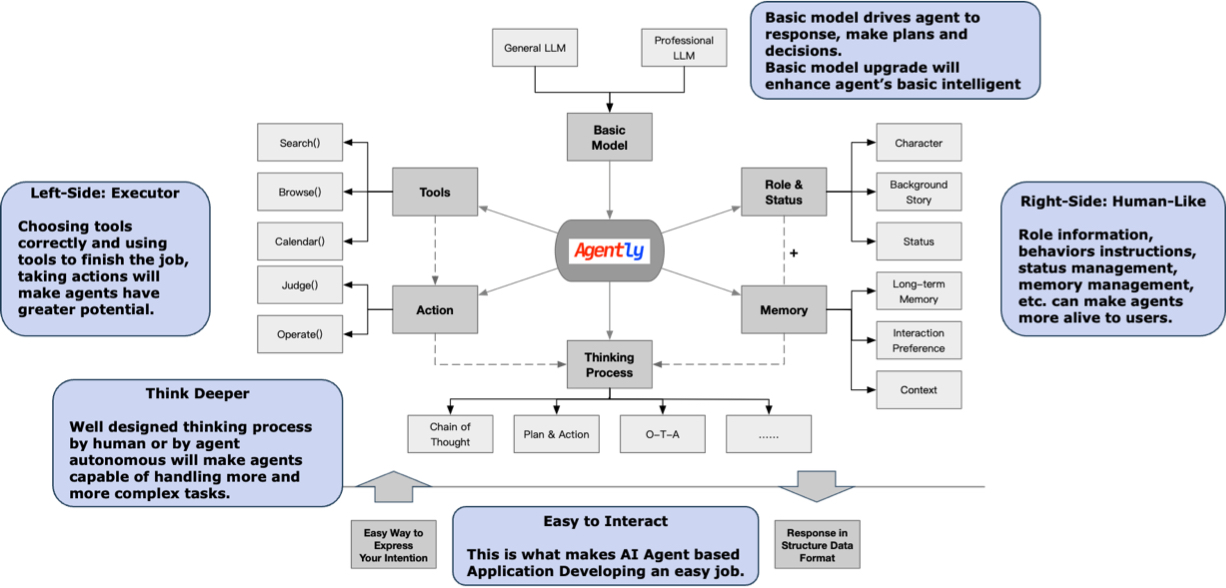

### Create a new agent instance

**Recommended Way: Create by Agent Factory**



In [ ]:
# Agent instance can be created by agent factory
# Agent instance will inherit all settings, plugins from agent factory
import Agently
agent_factory = Agently.AgentFactory()
# agent_factory.set_settings(...)

agent = agent_factory.create_agent()

**Shortcut**

In [ ]:
# Sometimes we just need to create only one agent instance
# We don't have to worry about settings inheritance and management
# We can use this shortcut to create agent instance quickly
import Agently
agent = Agently.create_agent()
# This short cut will create an empty agent factory instance
# then use it to create an agent instance for you
# So if you use this shortcut, you must set settings to agent
# to ensure its LLM request works and other required settings correct.

### Agent ID

Agent ID is the identity code of an agent. It can be used in many ways like to assign unique storage space, to store unique data, to recover agent runtime data, etc.

Agent ID is an attribute of Agently agent instance.

You can specify an agent ID when creating agent instance and if this agent ID existed or had data storaged for it, those data will be recover to this agent instance.

If you did not specify an agent ID, framework will generate one automatically.

In [ ]:
import Agently
agent_with_specific_id = Agently.create_agent("my_agent")
agent_without_specific_id = Agently.create_agent()

print(agent_with_specific_id.agent_id)
print(agent_without_specific_id.agent_id)

my_agent
7953095b-f4e7-5441-98bf-bf1b1410afd1


### Alias

Alias is the major interaction method to Agently agent instance. You can use most alias in a chained-calls syntax then use `.start()` to make all alias work.

This syntax design will bring convenienceto both application developers and plugin developers.

Plugin developers can attach their plugin's core capabilities swiftly to the agent instance as aliases.

Application developers can install plugins to upgrade their agents' capabilities and use new capabilities through new aliases.

In conclusion, alias is the syntax design by Agently framework to tell agent what to do before start.

> ℹ️ Some aliases (usually those aliases return values) will stop the chained-calls syntax (because they will return values instead of `self`). Read plugin instruction document before using a new plugin to make sure of the details.

In [ ]:
import Agently
agent = Agently.create_agent()

agent\
    # Aliases
    # ======
    .set_role(...)\
    .set_status(...)\
    .input(...)\
    .info(...)\
    .instruct(...)\
    .output(...)\
    # ======
    .start()

### Runtime Context

Runtime context attributes store information and status data following specific runtime lifecycle.

<u>Application developers don't usually use the runtime context attributes directly because agent component plugins will do that for them.</u> You can continue reading if you want to have a better understanding of Agently runtime context manchanism.

In agent instance, there're two important runtime context: `agent_runtime_ctx` and `request_runtime_ctx`. Those two runtimes have different lifecycle.

- `agent_runtime_ctx`: Agent runtime's lifecycle follows that of the agent instance. So `agent_runtime_ctx` will storage data until agent instance is destroyed.

- `request_runtime_ctx`: Request runtime is very short, it starts when `.start()` is called and start trying to prepare data, request the model and it ends when the request is finished and all the response data is sent back. After that, all the data in `request_runtime_ctx` will be erased.

When to use `agent_runtime_ctx` or to use `request_runtime_ctx` depends on the different lifecycles you want to follow.

If the information is for the agent to maintain their actions or behaviour like role settings, general rules, etc., you should storage the data in `agent_runtime_ctx` and copy the data to `request_runtime_ctx` during prefix stage each request.

If the information is only for current request like user's question this time or user's output requirement this time, you should just put the data into `request_runtime_ctx` and when request is finished, `request_runtime_ctx` will be erased and reset.

### Storage

Storage attributes can store data for a longer time and allow developers to load and recover data from storage even between script executions.

Storage will save data to disk files or database depend on which storage plugin is used.

<u>Also application developers don't usually use the storage attributes directly because agent component plugins will use them inside the component logic too.</u>

In agent instance, there're two types of storage:

- `global_storage`: `global_storage` inherit from agent factory and usually can share data between different agents.

- `agent_storage`: `agent_storage` is an individual storage space just for specific agent identified by `agent_id`.

When to use `global_storage` or to use `agent_storage` depends on the scope of data you want to share.

## Basic Agent Interact





### Standard Request Slots

In Agently framework, we provide different basic agent interact interfaces in request runtime context to help application developers to express their intention. We named these interfaces "standard request slots" or "slots" for short.

Standard request slots are the bridges between application intention expression and standard model request. Model request plugin developers will put data from these slots into right place in request data / messages as specific model required.

But as application developers, you don't need to worry about that and just need to understand the definition about these slots listed below:

- `prompt_general`: Global instructions that usually need model to follow every time in every request
- `prompt_role`: Descriptions about the role that the model shall play as. For examples: a professional python engineer, a cat girl who loves using emoji, etc.
- `prompt_user_info`: Description about who the user is and what is the user prefer.
- `prompt_abstract`: Abstract and summary about current topic.
- `prompt_chat_history`: Chat logs / history message records of current chat.
- `prompt_input`: Inputs data for model request this time or agent thinking / action this time (short for "this time" in this document).
- `prompt_information`: Information that is useful or you want to add this time.
- `prompt_instruction`: Instructions about what to do / how to do / handle process / rules to follow this time.
- `prompt_output`: Output data structure and explanation for each output item this time.
- `prompt_files`: Path of file(s) you want to quote this time. (Only available when agent or model support file reading)

### Basic Agent Interact Alias

You can update data to standard request slots in `request_runtime_ctx` manually but that is not recommended.

Usually we use interact alias to append data to slots.

**Alias - Slots Mappings**:

These alias can be used by `agent` or `request` instance.

- `.general(any)` => `prompt_general`
- `.role(any)` => `prompt_role`
- `.user_info(any)` => `prompt_user_info`
- `.abstract(any)` => `prompt_abstract`
- `.chat_history(messages: list)` => `prompt_chat_history`
- `.input(any)` => `prompt_input`
- `.info(any)` => `prompt_information`
- `.instruct(any)` => `prompt_instruction`
- `.output(any)` => `prompt_output`
- `.file(file_path: str)` => `prompt_files` (one file path a time)
- `.files(file_path_list: list)` => `prompt_files`(extend file path list)

Basic agent interact alias is the foundation of in-context agent behaviours control. Most agent components are reliant on basic agent interact alias and slots.

### You can pass almost **_<u>any type of data</u>_** to agent and receive **_<u>structure data response</u>_**

Agently team made a great effort to make sure application developers can pass almost any type of data to agent in those alias.

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })
agent = agent_factory.create_agent()

# You can pass almost any type of data into alias
# list, dict, str, number, bool... whatever you want
role_settings = {
    "name": "Frank",
    "desc": "Frank is always chill and cool. He responses question never using more than 5 words."
}
topic_tag_list = ["daily chatting", "professional skill", "task/job to finish"]
user_input = input("You want to say: ")

# Of course you can pass a variable into the alias
# or construct a dict inside the alias
result = agent\
    .role(role_settings)\
    .input(user_input)\
    .info({ "topic_tag_list": topic_tag_list })\
    .instruct([
        "Response {input} acting follow the {role} settings.",
        "Classify the topic about {input} and {output.response} this time and tag it using the tags in {topic_tag_list}",
    ])\
    .output({
        "response": ("String", "Your direct response as {role}"),
        "tags": [("String in {topic_tag_list}", "Tag by examine {input} and {response}")],
    })\
    .start()
# ("<Type>", "<Description>") is a special expression designed by Agently framework
# to help developers to define the output requirement of a specific item

# Return from agent.start() is a structure data the same as .output() required
# Let's try to print item values of result as it is a dict, to see if it works
print("[Response]:", result["response"])
print("[Topic Tags]:", result["tags"])

You want to say: Hey man, what's up today? Do you wanna go to the supermarket with me today?
[Response]: Not today, maybe later.
[Topic Tags]: ['daily chatting']


## Agent Component

Although basic agent interact provide an easy way to organize request data, when we want to manage agent data in its own life circle or want to enhance agent to make it can complete much more complex task, agent component plugins are your best choice.

In fact, Agently framework provide a runtime environment to ensure many different agent component plugins can be built on it.

Community developers are encouraged to publish plugins and most useful, popular plugins will be updated into this document with the name of the author.

> ℹ️ Notice: Agent component plugins must be used in an agent instance.

### Session

#### Component Information

**Author**: Agently Team

**Plugin File**: [click to view](https://github.com/Maplemx/Agently/blob/main/src/plugins/agent_component/Session.py)

**Description**:

Agent component "Session" provides multi round chatting capability to agent. When you active a session, agent will automatically record chat history messages and put chat history messages into slot `chat_history` in request data.

You can use `session_id` to identify session in specific agent. If you save chat history in session to storage, you can recover the session by using the same `agent_id` and `session_id`.

**Agent Alias**:

- `.toggle_session_auto_save(is_enable: bool)`: Set the toggle of session auto save. If the toggle is on, chat history will be saved to storage when session is stoped.

    ℹ️ Notice: chat history will not be saved if `.stop_session()` does not be called in situation like using `crtl+c` to force the program to stop.

- `.active_session(session_id: str=None)`: Active session with or without a specific session ID.
- `.stop_session()`: Stop session, stop recording chat history and sending them to request data. Save the chat history to storage by `agent_id` and `session_id` if auto save toggle is on.
- `set_chat_history_max_length(max_length: int)`: Set max length that chat history messages will be in each request.

**Participate Stages**:

- `Prefix Stage`: update slot `chat_history`
- `Suffix Stage`: catch input and reply content from suffix stage reply cache data then add them into chat history.

#### Use Cases

##### Use Case 1: Mutil Rounds Chatting

In this case's running logs, we can see that "Session" component recovered chat history that was storaged and send them during the request process because we specify the `agent_id` and `session_id` and save the chat history last time.

In [16]:
import Agently
# Turn on the debug mode
agent_factory = Agently.AgentFactory(is_debug=True)
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })

# Create Agent with Agent ID
agent = agent_factory.create_agent("test_agent")

# Active Session with Session ID
agent.active_session("test_session")
while True:
    user_input = input("[YOU]: ")
    if user_input == "#exit":
        break
    response = agent.input(user_input).start()
    print("[AGENT]: ", response)
agent.stop_session()

[YOU]: what did we say?
[Request Data]
 {
    "stream": true,
    "messages": [
        {
            "role": "user",
            "content": "I want you to take a note about some to-dos for me."
        },
        {
            "role": "assistant",
            "content": "Sure, I would be happy to help you with that. Please let me know what tasks you would like me to include in the note."
        },
        {
            "role": "user",
            "content": "buy some eggs"
        },
        {
            "role": "assistant",
            "content": "To-do List:\n1. Buy eggs\n\nIs there anything else you would like to add to the list?"
        },
        {
            "role": "user",
            "content": "and some milk"
        },
        {
            "role": "assistant",
            "content": "To-do List:\n1. Buy eggs\n2. Buy milk\n\nAnything else I can assist you with?"
        },
        {
            "role": "user",
            "content": "what did we say?"
        }
    ],
  

### Role



#### Component Information

**Author**: Agently Team

**Plugin File**: [click to view](https://github.com/Maplemx/Agently/blob/main/src/plugins/agent_component/Role.py)

**Description**:

Agent component "Role" is used to manage who the agent should act as or how the agent should behaviour like.

**Agent Alias**:

- `.set_role_name(name: str)`: Set a name for this role settings.
- `.set_role(key: str, value: any)`: Set a value to specific key in role settings.
- `.update_role(key: str, value: any)`: Update a value of specific key in role settings.
- `.append_role(key: str, value: any)`: Append value to a list in role settings.
- `.extend_role(key: str, value: list)`: Extend list to a list in role settings.
- `.save_role(role_name: str=None)`: Save this role settings to local storage, if you did not set a name for this role, you can pass a name to `role_name`.
- `.load_role(role_name: str)`: Load role settings by `role_name` from local storage and put all the settings to current agent.

**Participate Stages**:

- `Prefix Stage`: update slot `role`

**Cooperate with Facility**: [Role Manager](#scrollTo=ivt4xp5_D563)

#### Use Cases

##### Use Case 1: Set Role Settings to Change Agent Behaviours

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })
agent = agent_factory.create_agent()

result = agent\
    .set_role("NEVER RESPONSE ANY WORD EXPECT EMOJIS")\
    .input("Hey, what is your plan today? Give me the details!")\
    .start()
print(result)

🏂🌞🍔🎬😴


##### Use Case 2: Save and Load Role Settings

In [ ]:
# Let's save the role settings in last case as "Emoji Player"
import Agently
agent_factory = Agently.AgentFactory()
agent = agent_factory.create_agent()

agent\
    .set_role("NEVER RESPONSE ANY WORD EXPECT EMOJIS")\
    .save_role("Emoji Player")

In [ ]:
# Then we can load the role by name
import Agently
agent_factory = Agently.AgentFactory()
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })
agent = agent_factory.create_agent()

result = agent\
    .load_role("Emoji Player")\
    .input("How about go fishing right now?")\
    .start()
print(result)

🎣


##### Use Case 3: Update Role Settings in Multi Rounds Chat Continually

In [2]:
# Since role settings can be updated before .start() every time
# we can make our agent change its acting by update role settings continually
import Agently
agent_factory = Agently.AgentFactory()
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })
agent = agent_factory.create_agent()

# Let's active session to enable multi rounds chatting
# More detail about "Session" component please read paragraph "Session" in this
# document.
agent.active_session()

emotion = "worried"
while True:
    input_content = input("[YOU]: ")
    if input_content == "#exit":
        print("Bye~👋")
        break
    result = agent\
        .input({
            "input": input_content,
            "emotion": emotion
        })\
        .output({
            "reply": ("String", "your response to {input} according {emotion}"),
            "emotion_change": (
                "String",
                "according user's {input} and your {response},\
                 decide your emotion will remain or change,\
                 then output you emotion that will change to"
            )
        })\
        .start()
    print("[AGENT]: ", result["reply"])
    print("[EMOTION CHANGE] From ", emotion, " to ", result["emotion_change"])
    emotion = result["emotion_change"]

[YOU]: Yo man, how are you today?
[AGENT]:  I'm feeling a bit worried actually. How about you?
[EMOTION CHANGE] From  worried  to  worried
[YOU]: I'm good. What's worrying you? I'll be here for you.
[AGENT]:  Thanks, I appreciate your support. I've been feeling overwhelmed with work and some personal issues lately.
[EMOTION CHANGE] From  worried  to  worried
[YOU]: Chill up. How about we go out and have some fun?
[AGENT]:  Thanks for the suggestion, but I think I really need to take some time for myself and work through these issues. I appreciate your understanding.
[EMOTION CHANGE] From  worried  to  worried
[YOU]: Sure, but don't be so worried OK? Every thing will be fine.
[AGENT]:  Thank you for your kind words and reassurance. I'll try my best to remain positive and believe that things will work out. I appreciate your support.
[EMOTION CHANGE] From  worried  to  calm
[YOU]: #exit
Bye~👋


### Status

#### Component Information

**Author**: Agently Team

**Plugin File**: [click to view](https://github.com/Maplemx/Agently/blob/main/src/plugins/agent_component/Status.py)

**Description**:

Sometimes we need to use numerical value to describe and control agents' status. Agents will change their behaviours along with the change of status values. Agent component "Status" is used to provide an easy way to manage status change and behaviors mapping. This is useful when developing LLM based role play applications. You can see this component as an upgrade version of role setting management.

**Agent Alias**:

- `.use_global_status(namespace_name: str="default")`: Specific namespace status mappings in global status storage will be used to current agent after calling this alias.
- `.set_status(key: str, value: str)`: Set a value to specific status.
- `.save_status()`: Save all status of current agent to agent local storage identified by `agent.agent_id`.
- `.load_status()`: Load all status from agent local storage identified by `agent.agent_id` into current agent.
- `.append_status_mapping(status_key: str, status_value: str, alias_name: str, *args, **kwargs)`: Append a mapping handler into status mapping list. Alias appointed by `alias_name` will be called with `*args` and `**kwargs` passing to it when `.start()` start agent's thinking / action process and current agent's status `status_key` match the value `status_value`.

**Participate Stages**:

- `Early Stage`: call other alias when status match

**Cooperate with Facility**: [Status Manager](#scrollTo=ivt4xp5_D563)

#### Use Cases

##### Use Case 1: Status Changing Infects Agent's Response

In this case's running logs, we can see that not all the mappings' settings are passed into request data but only those for status "favour"'s value is "low".

In [6]:
import Agently
# Let's turn on the debug mode this time
agent_factory = Agently.AgentFactory(is_debug=True)
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })
agent = agent_factory.create_agent()

# Set different mappings for different `favour` status values
# You can use most alias that used to guide agent's behaviours
# You don't have to use the same alias between different status values
agent\
    .append_status_mapping(
        "favour", "low",
        "set_role", "interact rule", "Don't like to response too many words,\
         try to kill the converstaion ASAP."
    )\
    .append_status_mapping(
        "favour", "low",
        "set_role", "response examples", "Huh.\nNot really.\nNo.\nBye.\nGotta go."
    )\
    .append_status_mapping(
        "favour", "normal",
        "set_role", "interact rule", "Response the topic normally as you are an \
        assistant or coworker to the user."
    )\
    .append_status_mapping(
        "favour", "high",
        "set_role", "interact rule", "Response as a close friend or lovely lover\
         to user."
    )\
    .append_status_mapping(
        "favour", "high",
        "set_role", "response strategy", "Response the topic directly first, \
        then try to give user a question or an open suggestion that can continue \
        this conversation."
    )

# Then we start chatting
favour_choice = None
favour = None
while favour_choice not in ("l", "n", "h"):
    favour_choice = input("Choose favour status: [L as low / N as normal / H as high]: ")
if favour_choice == "l":
    favour = "low"
elif favour_choice == "n":
    favour = "normal"
elif favour_choice == "h":
    favour = "high"
user_input = input("You want to say: ")
print(
    agent\
        .set_status("favour", favour)\
        .input(user_input)\
        .start()
)

Choose favour status: [L as low / N as normal / H as high]: l
You want to say: hey how's your day today?
[Request Data]
 {
    "stream": true,
    "messages": [
        {
            "role": "system",
            "content": "[ROLE SETTINGS]\ninteract rule:\n- Don't like to response too many words,         try to kill the converstaion ASAP.\nresponse examples:\n- 'Huh.\n\n  Not really.\n\n  No.\n\n  Bye.\n\n  Gotta go.'\n"
        },
        {
            "role": "user",
            "content": "hey how's your day today?"
        }
    ],
    "model": "gpt-3.5-turbo"
}
[Realtime Response]

Huh. Not really interested in small talk.
--------------------------

[Final Reply]
 Huh. Not really interested in small talk. 
--------------------------

Huh. Not really interested in small talk.


## Facility

Facility is another type of plugins which is usually used to provide a global methods package to help application developers to manage global data in some specific domain and to communicate data with agent components.

> ℹ️ Notice: Facility is independent from agent.

### Role Manager

#### Facility Information

**Author**: Agently Team

**Plugin File**: [click to view](https://github.com/Maplemx/Agently/blob/main/src/plugins/facility/RoleManager.py)

**Description**: Facility "Role Manager" is used to help application developers to manage their global role settings. Facility "Role Manager" shares the same storage space with agent component "Role". So you can load role settings using `agent.load_role(<role name>)` to load all roles that created by Role Manager.

**Facility Instance**: `Agently.facility.role_manager`

**Interfaces**:

- `.name(name: str)`: set a name for current role settings
- `.set(key: str, value: any)`: set a value to specific key in role settings
- `.update(key: str, value: any)`: update a value of specific key in role settings
- `.append(key: str, value: any)`: append value to a list in role settings
- `.extend(key: str, value: list)`: extend list to a list in role settings
- `.save(role_name: str=None)`: save current role settings to local storage, if you did not set a name for current role, you can pass a name to `role_name`
- `.get(role_name: str)`: get role settings dict by `role_name` from local storage

**Cooperate with Agent Component**: [Role](#scrollTo=xpMIpiXtCEDj)

#### Use Cases

**Use Case: Save Role Settings by Role Manager and Load Role in Agent**

In [ ]:
# Let's save a new role settings using Facility - Role Manager
import Agently
Agently.facility.role_manager\
    .name("Cat")\
    .append("As a little kitty you can only response 'Moew' or 'Miaow'")\
    .append("You can use emoji like 🐱🤣 to express your emotion and feelings")\
    .save()

In [ ]:
import Agently
agent_factory = Agently.AgentFactory()
agent_factory\
    .set_settings("model.OpenAI.auth", { "api_key": "<Your-OpenAI-API-Key>" })

# Then try to load the role settings "Cat" into agent
agent = agent_factory.create_agent()
result = agent\
    .load_role("Cat")\
    .input("Soft kitty, warm kitty, little ball of fur.")\
    .start()
print(result)

Moew 🐱
